In [4]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

#### Important: Restart the Kernel before you move on to the next step.

In [5]:
# Install requirements
!python -m pip install -r requirements.txt
!pip install ipywidgets --upgrade


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 857 kB/s eta 0:00:01    |████████▋                       | 9.9 MB 857 kB/s eta 0:00:32
     |████████████████████████████████| 19.3 MB 64.1 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 71.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 59.7 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 77.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 69.4 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 55.2 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.1 MB/s eta 0:00:01
     |█████████████████████

     |████████████████████████████████| 93 kB 3.0 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=465fe402e8d0e31859956ec7d91365dc31cfa12010c9cc306164fedf46c70716
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
Defaulting to user installat

  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0


## Imports

In [ ]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [7]:
# Define transforms
## YOUR CODE HERE ##
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations for the training and test sets
transform_list = [
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean and std
]

transform = transforms.Compose(transform_list)



# Create training set and define training dataloader
## YOUR CODE HERE ##

# Create the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# Define the training DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)


# Create test set and define test dataloader
## YOUR CODE HERE ##
# Create the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define the test DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=False, num_workers=2)

# Verify the datasets and dataloaders
print(f'Training dataset size: {len(train_dataset)}')
print(f'Number of batches in training dataloader: {len(train_dataloader)}')
print(f'Test dataset size: {len(test_dataset)}')
print(f'Number of batches in test dataloader: {len(test_dataloader)}')


for images, labels in train_dataloader:
    print(f'Batch of images shape: {images.shape}')
    print(f'Batch of labels shape: {labels.shape}')
    break

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Training dataset size: 60000
Number of batches in training dataloader: 938
Test dataset size: 10000
Number of batches in test dataloader: 10
Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**
I used preprocessing to normalize the dataset to have a mean of 0 and standard deviation of 1 to speed up the training process. I also convereted the image data to PyTorch tensors.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [ ]:
# Explore data
## YOUR CODE HERE ##
show5(train_dataloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
## YOUR CODE HERE ##
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)     # Second fully connected layer
        self.fc3 = nn.Linear(64, 10)      # Output layer

    def forward(self, x):
        x = self.flatten(x)           # Flatten the input tensor
        x = F.relu(self.fc1(x))       # Apply ReLU activation after first layer
        x = F.relu(self.fc2(x))       # Apply ReLU activation after second layer
        x = self.fc3(x)               # Output layer (logits)
        return x


model = SimpleNN()

print(model)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
## YOUR CODE HERE ##
model = SimpleNN()

#  loss function
criterion = nn.CrossEntropyLoss()

#  optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)



## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [14]:
# GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# number of epochs
num_epochs = 5

# Lists to store training loss 
train_losses = []

i = 0

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0    
    i+=1
    print(i)
    for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)
      
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Update running loss
        running_loss += loss.item()
        
        # Print loss every 250 batches
        if (batch_idx + 1) % 250 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')
    
    # Compute average loss for the epoch
    avg_loss = running_loss / len(train_dataloader)
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

print("Training complete!")


1
Epoch [1/5], Step [250/938], Loss: 0.0323
Epoch [1/5], Step [750/938], Loss: 0.0133
Epoch [1/5], Average Loss: 0.0314
2
Epoch [2/5], Step [250/938], Loss: 0.0245
Epoch [2/5], Step [500/938], Loss: 0.0022
Epoch [2/5], Step [750/938], Loss: 0.0040
Epoch [2/5], Average Loss: 0.0264
3
Epoch [3/5], Step [250/938], Loss: 0.0079
Epoch [3/5], Step [500/938], Loss: 0.0539
Epoch [3/5], Step [750/938], Loss: 0.0169
Epoch [3/5], Average Loss: 0.0228
4
Epoch [4/5], Step [250/938], Loss: 0.0029
Epoch [4/5], Step [500/938], Loss: 0.0886
Epoch [4/5], Step [750/938], Loss: 0.0548
Epoch [4/5], Average Loss: 0.0251
5
Epoch [5/5], Step [500/938], Loss: 0.0074
Epoch [5/5], Step [750/938], Loss: 0.0072
Epoch [5/5], Average Loss: 0.0182
Training complete!


Plot the training loss (and validation loss/accuracy, if recorded).

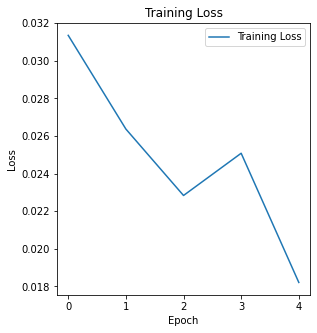

In [15]:
## YOUR CODE HERE ##
import matplotlib.pyplot as plt


# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
## YOUR CODE HERE ##
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for data, target in test_dataloader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        
        # Get the index of the max probability
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Accuracy of the model on the test images: 97.66%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [18]:
## YOUR CODE HERE ##
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

# Improved Neural Network Architecture with Dropout and Batch Normalization
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the improved model
model = ImprovedNN().to(device)

# Specify the loss function and optimizer with a modified learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Hyperparameters
num_epochs = 10
batch_size = 128

# Data Augmentation
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load datasets with new transformations
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define DataLoaders with new batch size
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (batch_idx + 1) % 250 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')
    
    avg_loss = running_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

print("Training complete!")

# Evaluation loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Epoch [1/10], Step [250/469], Loss: 0.6454
Epoch [1/10], Average Loss: 0.8247
Epoch [2/10], Average Loss: 0.4522
Epoch [3/10], Step [250/469], Loss: 0.3443
Epoch [3/10], Average Loss: 0.3845
Epoch [4/10], Step [250/469], Loss: 0.2613
Epoch [4/10], Average Loss: 0.3497
Epoch [5/10], Average Loss: 0.3236
Epoch [6/10], Step [250/469], Loss: 0.2621
Epoch [6/10], Average Loss: 0.3136
Epoch [7/10], Step [250/469], Loss: 0.3713
Epoch [7/10], Average Loss: 0.2953
Epoch [8/10], Average Loss: 0.2824
Epoch [9/10], Step [250/469], Loss: 0.2962
Epoch [9/10], Average Loss: 0.2744
Epoch [10/10], Step [250/469], Loss: 0.3247
Accuracy of the model on the test images: 95.57%


## Saving your model
Using `torch.save`, save your model for future loading.

In [19]:
## YOUR CODE HERE ##

# Define the file path where you want to save your model
model_path = 'Ny_MNIST_Handwritten_Digits-STARTER_nn_model.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")

Model saved to Ny_MNIST_Handwritten_Digits-STARTER_nn_model.pth
